In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
reactiveness = pd.read_hdf("reactiveness.hdf")
ima = pd.read_hdf("ima.hdf")

In [48]:
reactiveness.head()

,Device,Trip,AlertLevel,RvYawRate,HvYawRate,RvSpeed,HvSpeed,RvLongitudinalAccel,HvLongitudinalAccel,ReactionTime,Time
0,2004.0,54.0,3.0,0.0,-0.970000,11.380001,6.277778,1000.0,0.8282,6.0,109450.0
1,2004.0,55.0,3.0,0.0,18.059999,10.820000,3.941667,1000.0,0.7894,10.0,9800.0
2,2008.0,61.0,2.0,0.0,0.000000,22.760002,0.000000,1000.0,0.0716,0.5,222650.0
3,2147.0,156.0,2.0,0.0,0.240000,25.000000,0.000000,1000.0,0.0134,0.5,136900.0
4,2331.0,20.0,2.0,0.0,0.020000,14.160000,0.000000,1000.0,-0.0060,0.5,194450.0


In [ ]:
#reaction time by distribution by device and by trip
#how does yawrate of hv, and yaw rate of rv affecte reaction time
#rvspeed, hv speed effect?
#Rvlongitudinalaccel, hv longitudinal accel?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

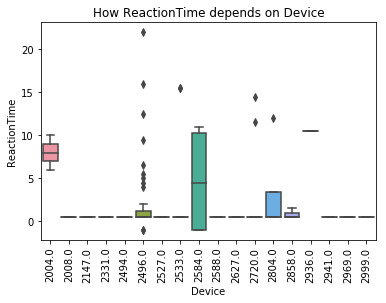

In [65]:
plt.figure()
sns.boxplot(x="Device", y="ReactionTime", data =reactiveness)
plt.title("How ReactionTime depends on Device")
plt.xticks(rotation = 'vertical')

In [50]:
reactiveness['ReactionTime'].describe()

count    137.000000
mean       1.919708
std        3.928700
min       -1.000000
25%        0.500000
50%        0.500000
75%        0.500000
max       22.000000
Name: ReactionTime, dtype: float64

In [30]:
reactiveness.sort_values('Trip', inplace = True)
reactiveness_trip = reactiveness.set_index(keys = 'Trip')
unique_trips = reactiveness_trip.index.unique()
trip_indexes = np.array_split(unique_trips, 4)

C:\Users\lib_laptop\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


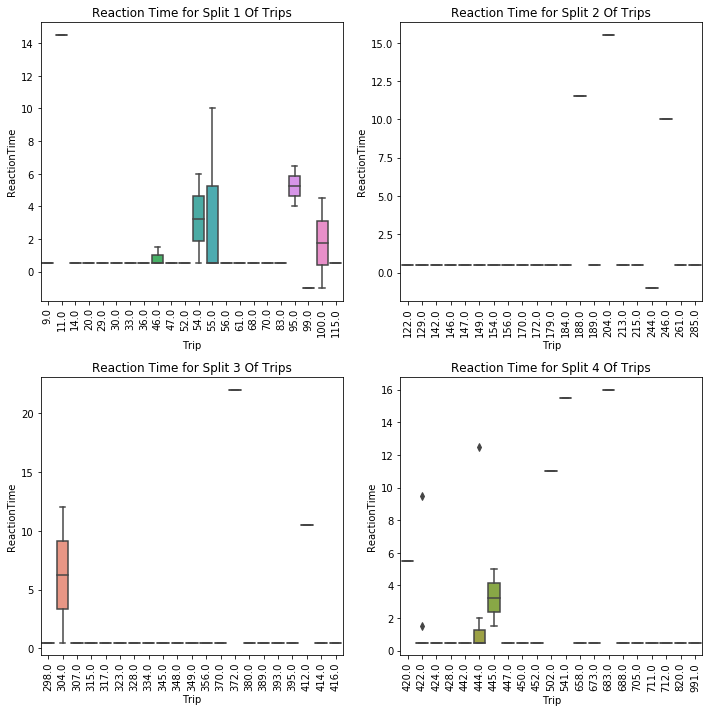

In [45]:
fig = plt.figure(figsize = (10,10))
fig.set_tight_layout(True)
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    ax.set_title("Reaction Time for Split "+str(i)+" Of Trips")
    subdf = reactiveness_trip.loc[trip_indexes[i-1],:]
    sns.boxplot(x=subdf.index, y=subdf["ReactionTime"], data =subdf)
    plt.xticks(rotation = 'vertical')

In [52]:
reactiveness['RvYawRate'].value_counts()

0.0    137
Name: RvYawRate, dtype: int64

Text(0.5, 1.0, 'Effect of HVYawrate on ReactionTime')

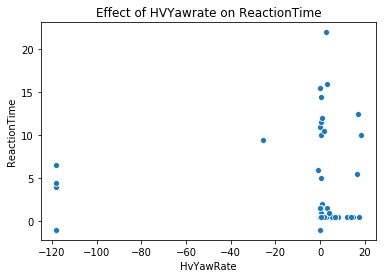

In [54]:
plt.figure()
sns.scatterplot(x = 'HvYawRate', y = 'ReactionTime',data = reactiveness )
plt.title("Effect of HVYawrate on ReactionTime")

Text(0.5, 1.0, 'Effect of HVSpeed on ReactionTime')

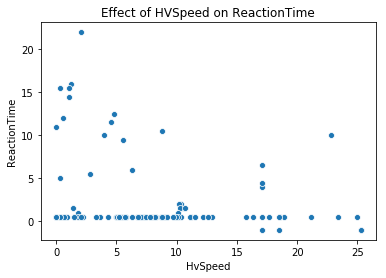

In [57]:
#hvspeed
plt.figure()
sns.scatterplot(x = 'HvSpeed', y = 'ReactionTime',data = reactiveness )
plt.title("Effect of HVSpeed(mph) on ReactionTime")

Text(0.5, 1.0, 'Effect of RvSpeed(mph) on ReactionTime')

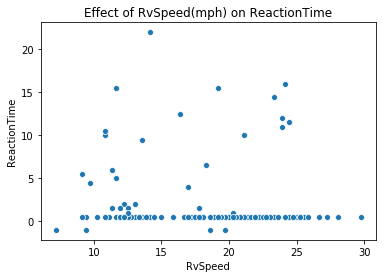

In [59]:
#rvspeed
plt.figure()
sns.scatterplot(x = 'RvSpeed', y = 'ReactionTime',data = reactiveness )
plt.title("Effect of RvSpeed(mph) on ReactionTime")

Text(0.5, 1.0, 'Effect of HvLongitudinalAccel on ReactionTime')

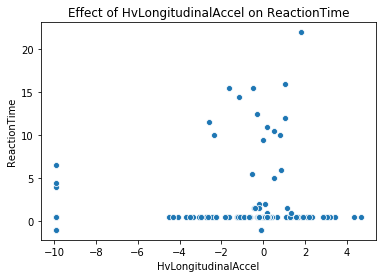

In [60]:
#HvLongitudinalAccel
plt.figure()
sns.scatterplot(x = 'HvLongitudinalAccel', y = 'ReactionTime',data = reactiveness )
plt.title("Effect of HvLongitudinalAccel on ReactionTime")

(array([ 999.99875,  999.999  ,  999.99925,  999.9995 ,  999.99975,
        1000.     , 1000.00025, 1000.0005 , 1000.00075, 1000.001  ,
        1000.00125]), <a list of 11 Text xticklabel objects>)

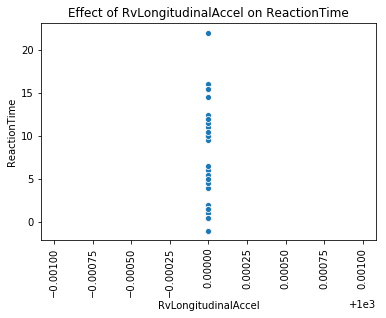

In [64]:
#RvLongitudinal Accel
plt.figure()
sns.scatterplot(x = 'RvLongitudinalAccel', y = 'ReactionTime',data = reactiveness )
plt.title("Effect of RvLongitudinalAccel on ReactionTime")
plt.xticks(rotation = 90)